### Import the libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

### Load the dataset

In [2]:
data = pd.read_csv("/content/NF-UNSW-NB15.csv")
data.head()

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,Attack
0,149.171.126.0,62073,59.166.0.5,56082,6.0,0.0,9672.0,416.0,11.0,8.0,25.0,15.0,0.0,Benign
1,149.171.126.2,32284,59.166.0.5,1526,6.0,0.0,1776.0,104.0,6.0,2.0,25.0,0.0,0.0,Benign
2,149.171.126.0,21,59.166.0.1,21971,6.0,1.0,1842.0,1236.0,26.0,22.0,25.0,1111.0,0.0,Benign
3,59.166.0.1,23800,149.171.126.0,46893,6.0,0.0,528.0,8824.0,10.0,12.0,27.0,124.0,0.0,Benign
4,59.166.0.5,63062,149.171.126.2,21,6.0,1.0,1786.0,2340.0,32.0,34.0,25.0,1459.0,0.0,Benign


In [3]:
len(data)

217002

In [4]:
data.columns

Index(['IPV4_SRC_ADDR', 'L4_SRC_PORT', 'IPV4_DST_ADDR', 'L4_DST_PORT',
       'PROTOCOL', 'L7_PROTO', 'IN_BYTES', 'OUT_BYTES', 'IN_PKTS', 'OUT_PKTS',
       'TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS', 'Label', 'Attack'],
      dtype='object')

In [5]:
data.dropna(subset=['Attack'], inplace=True)

In [6]:
data['Attack'].unique()

array(['Benign', 'Exploits', 'Reconnaissance', 'DoS', 'Generic',
       'Shellcode', 'Backdoor', 'Fuzzers', 'Worms', 'Analysis'],
      dtype=object)

In [7]:
data['Attack'].value_counts()

Attack
Benign            201355
Exploits            5349
Fuzzers             3703
Reconnaissance      2760
Generic             1324
DoS                 1244
Analysis             588
Backdoor             353
Shellcode            290
Worms                 35
Name: count, dtype: int64

## Without Pre-processing

In [8]:
X = data.drop(['Attack', 'IPV4_SRC_ADDR', 'IPV4_DST_ADDR'], axis=1)
y = data.loc[:, 'Attack']
X.head()

,L4_SRC_PORT,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label
0,62073,56082,6.0,0.0,9672.0,416.0,11.0,8.0,25.0,15.0,0.0
1,32284,1526,6.0,0.0,1776.0,104.0,6.0,2.0,25.0,0.0,0.0
2,21,21971,6.0,1.0,1842.0,1236.0,26.0,22.0,25.0,1111.0,0.0
3,23800,46893,6.0,0.0,528.0,8824.0,10.0,12.0,27.0,124.0,0.0
4,63062,21,6.0,1.0,1786.0,2340.0,32.0,34.0,25.0,1459.0,0.0


### Model Creation

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

### Different Model with Evalaution Metrics and Visualization

In [10]:
model=LogisticRegression(random_state=0)
model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [11]:
# Calculate accuracy and confusion matrix
conf_matrix = confusion_matrix(model.predict(x_train), y_train)
accuracy = accuracy_score(model.predict(x_train), y_train)
precision = precision_score(model.predict(x_train), y_train, average='weighted')
recall = recall_score(model.predict(x_train), y_train, average='weighted')
f1 = f1_score(model.predict(x_train), y_train,average='weighted')
# Print results
print("Confusion Matrix:")
print(conf_matrix)
print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix:
[[     0      0      0      0      0      0      0      0      0      0]
 [     0      0      0      0      0      0      0      0      0      0]
 [   466    285 181173   1043   4698   3243   1124   2429    266     30]
 [     0      0      0      0      2      0      0      0      0      0]
 [     0      0     25      6     43      1      1      0      0      0]
 [    74     37      4     73     76     69     68     64      0      0]
 [     0      0      0      0      0      0      0      0      0      0]
 [     0      0      0      0      0      0      0      0      0      0]
 [     0      0      0      0      0      0      0      0      0      0]
 [     0      0      0      0      0      0      0      0      0      0]]

Accuracy: 0.9282386072708654
Precision: 0.997113125194042
Recall: 0.9282386072708654
F1 Score: 0.961205405593185


In [12]:
# Train the model
model1 = GaussianNB().fit(x_train, y_train)
# Make predictions
y_pred = model1.predict(x_test)

In [13]:
# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy1 = accuracy_score(y_test, y_pred)
precision1 = precision_score(y_test, y_pred, average='weighted')
recall1 = recall_score(y_test, y_pred, average='weighted')
f11 = f1_score(y_test, y_pred, average='weighted')
# Print results
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy:", accuracy1)
print("Precision:", precision1)
print("Recall:", recall1)
print("F1 Score:", f11)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix:
[[   45     0     0     0     0     1     1     1     0     0]
 [   25     0     1     0     0     0     0     0     5     0]
 [ 1254     9 11599   451    38   126    32  5439  1205     0]
 [   51     4    14     0     3    11     0    36     3     0]
 [   50    10   106     7    30    44     2   253    28     0]
 [   52     2     2     0     2   150     1    84    97     0]
 [   52    13    25     0     1     8     6    25     1     0]
 [   52     0     0     0     0     2     2   211     0     0]
 [    0     0     0     0     0     0     0     0    24     0]
 [    0     1     1     0     0     2     0     1     0     0]]

Classification Report:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                precision    recall  f1-score   support

      Analysis       0.03      0.94      0.06        48
      Backdoor       0.00      0.00      0.00        31
        Benign       0.99      0.58      0.73     20153
           DoS       0.00      0.00      0.00       122
      Exploits       0.41      0.06      0.10       530
       Fuzzers       0.44      0.38      0.41       390
       Generic       0.14      0.05      0.07       131
Reconnaissance       0.03      0.79      0.07       267
     Shellcode       0.02      1.00      0.03        24
         Worms       0.00      0.00      0.00         5

      accuracy                           0.56     21701
     macro avg       0.20      0.38      0.15     21701
  weighted avg       0.94      0.56      0.69     21701


Accuracy: 0.5559651628957191
Precision: 0.9359608619289266
Recall: 0.5559651628957191
F1 Score: 0.6864824616627481


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
# Initialize the classifier with random_state=0
mlp1 = MLPClassifier(random_state=0)
# Fit the classifier to the training data
mlp1.fit(x_train, y_train)

MLPClassifier(random_state=0)

In [15]:
accuracy2 = accuracy_score(mlp1.predict(x_train), y_train)
print("Accuracy:",accuracy2)
y_pred = mlp1.predict(x_test)
precision2 = precision_score(y_test, y_pred, average='weighted')
recall2 = recall_score(y_test, y_pred, average='weighted')
f12 = f1_score(y_test, y_pred, average='weighted')
print("Precision:", precision2)
print("Recall:", recall2)
print("F1-score:", f12)

Accuracy: 0.9312698412698412


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: 0.8837848385976054
Recall: 0.931293488779319
F1-score: 0.9064720697889956


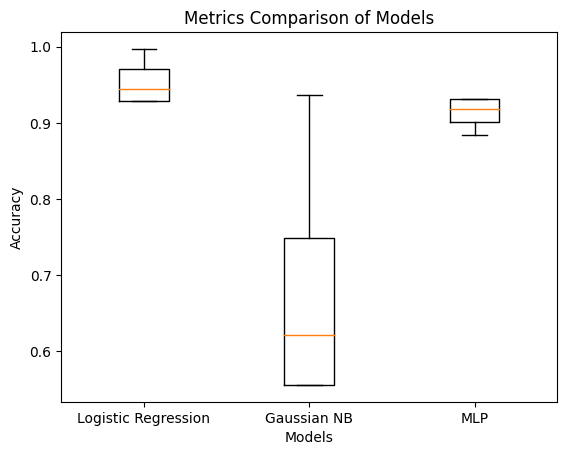

In [16]:
# Visualize accuracy scores
models = ['Logistic Regression', 'Gaussian NB', 'MLP']
accuracies = [
    [accuracy, precision, recall, f1],  # Logistic Regression accuracies
    [accuracy1, precision1, recall1, f11],  # Gaussian NB accuracies
    [accuracy2, precision2, recall2, f12]   # MLP accuracies
]
import matplotlib.pyplot as plt
plt.boxplot(accuracies, labels=models)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Metrics Comparison of Models')
# Display the plot
plt.show()

### Feature contribution in the model

In [17]:
print("Features contributing to the model:")
for i, class_label in enumerate(model.classes_):
    print(f"\nClass: {class_label}")
    print("Means:")
    class_means = x_train[y_train == class_label].mean().sort_values(ascending=False)
    print(class_means)  # Mean for each feature in this class
    print("Variances:")
    class_variances = x_train[y_train == class_label].var().sort_values(ascending=False)
    print(class_variances)  # Variance for each feature in this class

Features contributing to the model:

Class: Analysis
Means:
L4_SRC_PORT                   5437.611111
IN_BYTES                       381.037037
FLOW_DURATION_MILLISECONDS     370.779630
OUT_BYTES                      137.744444
PROTOCOL                       111.457407
L4_DST_PORT                      9.231481
L7_PROTO                         5.666667
IN_PKTS                          3.653704
TCP_FLAGS                        3.135185
OUT_PKTS                         1.014815
Label                            1.000000
dtype: float64
Variances:
L4_SRC_PORT                   2.482456e+08
FLOW_DURATION_MILLISECONDS    8.620008e+06
IN_BYTES                      1.078065e+06
OUT_BYTES                     1.452706e+05
PROTOCOL                      6.428965e+03
L4_DST_PORT                   6.519593e+02
L7_PROTO                      3.730241e+02
TCP_FLAGS                     7.467742e+01
IN_PKTS                       3.615629e+01
OUT_PKTS                      8.066570e+00
Label                 

### Ablation Analysis

In [18]:
# Perform ablation analysis
removed_features = []
scores = []

for feature in X.columns:
    # Remove the current feature
    reduced_features = X.drop(feature, axis=1)

    x_train, x_test, y_train, y_test = train_test_split(reduced_features, y, test_size=0.1)

    # Train a new model without the feature
    model = LogisticRegression(random_state=0)
    model.fit(x_train, y_train)

    # Evaluate the model without the feature
    score = accuracy_score(y_test, model.predict(x_test))
    scores.append(score)

    # Store the removed feature
    removed_features.append(feature)

# Create a dataframe with results
results_df = pd.DataFrame({"Feature Removed": removed_features, "Accuracy Score": scores})

# Print the results
print("Ablation Analysis Results:")
print(results_df.to_string())

# Compare the original and reduced model performance
print("Reduced Model Accuracy Range:", min(scores), "-", max(scores))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Ablation Analysis Results:
               Feature Removed  Accuracy Score
0                  L4_SRC_PORT        0.908437
1                  L4_DST_PORT        0.929358
2                     PROTOCOL        0.930879
3                     L7_PROTO        0.930694
4                     IN_BYTES        0.927100
5                    OUT_BYTES        0.930787
6                      IN_PKTS        0.929404
7                     OUT_PKTS        0.925395
8                    TCP_FLAGS        0.929635
9   FLOW_DURATION_MILLISECONDS        0.926962
10                       Label        0.929496
Reduced Model Accuracy Range: 0.9084373991981937 - 0.9308787613474033


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


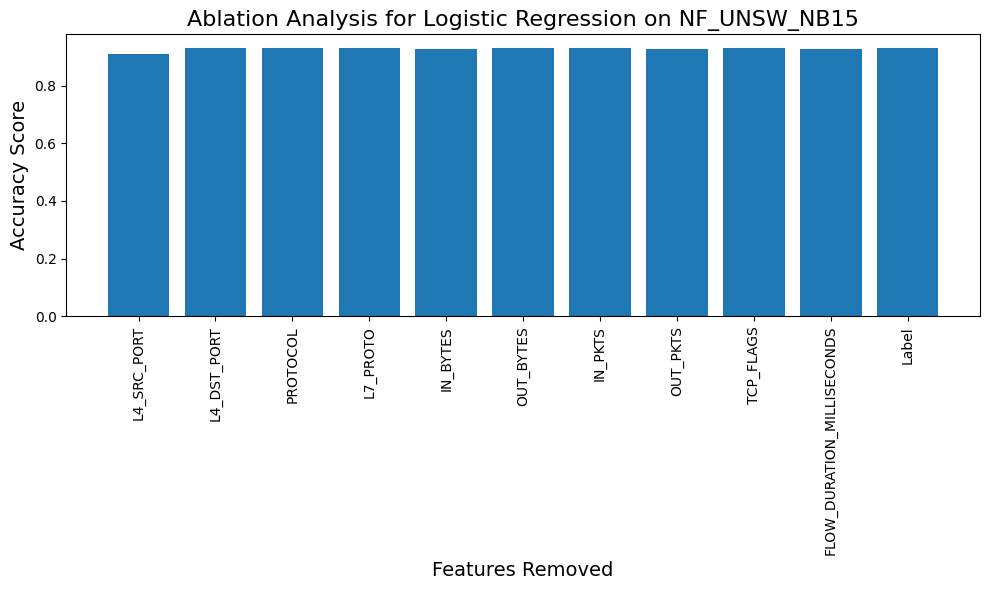

In [19]:
# Prepare data
features = results_df["Feature Removed"]
scores = results_df["Accuracy Score"]

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(features, scores)

# Add labels and title
plt.xlabel("Features Removed", fontsize=14)
plt.ylabel("Accuracy Score", fontsize=14)
plt.title("Ablation Analysis for Logistic Regression on NF_UNSW_NB15", fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

## With Preprocessing

### Load the dataset

In [20]:
data = pd.read_csv("/content/NF-UNSW-NB15.csv")
data.head()

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,Attack
0,149.171.126.0,62073,59.166.0.5,56082.0,6.0,0.0,9672.0,416.0,11.0,8.0,25.0,15.0,0.0,Benign
1,149.171.126.2,32284,59.166.0.5,1526.0,6.0,0.0,1776.0,104.0,6.0,2.0,25.0,0.0,0.0,Benign
2,149.171.126.0,21,59.166.0.1,21971.0,6.0,1.0,1842.0,1236.0,26.0,22.0,25.0,1111.0,0.0,Benign
3,59.166.0.1,23800,149.171.126.0,46893.0,6.0,0.0,528.0,8824.0,10.0,12.0,27.0,124.0,0.0,Benign
4,59.166.0.5,63062,149.171.126.2,21.0,6.0,1.0,1786.0,2340.0,32.0,34.0,25.0,1459.0,0.0,Benign


### Model Creation

In [21]:
data.dropna(subset=['Attack'], inplace=True)

In [22]:
print("Data Shape:", data.shape)

def check_null(data):
    for i in data.isnull().sum():
        if data.isnull().sum()[i]!=0:
            return print("Data contains Null values.")
    return print("Data is Clean of Null values.")


def check_NA(data):
    for i in data.isna().sum():
        if data.isna().sum()[i]!=0:
            return print("Data contains Null.")
    return print("Data is Clean of NA.")

Data Shape: (635986, 14)


In [23]:
check_null(data)
check_NA(data)

Data is Clean of Null values.
Data is Clean of NA.


In [24]:
print(data.duplicated().sum(), "fully duplicate rows to remove")
data.drop_duplicates(inplace=True)
data.reset_index(inplace=True, drop=True)
data.shape

1204 fully duplicate rows to remove


(634782, 14)

In [25]:
X = data.drop(['Attack', 'IPV4_SRC_ADDR', 'IPV4_DST_ADDR', 'L4_SRC_PORT', 'L4_DST_PORT'], axis=1)
y = data.loc[:, 'Attack']
X.head()

,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label
0,6.0,0.0,9672.0,416.0,11.0,8.0,25.0,15.0,0.0
1,6.0,0.0,1776.0,104.0,6.0,2.0,25.0,0.0,0.0
2,6.0,1.0,1842.0,1236.0,26.0,22.0,25.0,1111.0,0.0
3,6.0,0.0,528.0,8824.0,10.0,12.0,27.0,124.0,0.0
4,6.0,1.0,1786.0,2340.0,32.0,34.0,25.0,1459.0,0.0


In [26]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

### Normalization

In [27]:
sc = StandardScaler()

X_train_sc = sc.fit_transform(x_train)
X_test_sc = sc.transform(x_test)

### Different Model with Evalaution Metrics and Visualization

In [28]:
model=LogisticRegression(random_state=0)
model.fit(X_train_sc, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [29]:
# Calculate accuracy and confusion matrix
conf_matrix = confusion_matrix(model.predict(X_train_sc), y_train)
accuracy = accuracy_score(model.predict(X_train_sc), y_train)
precision = precision_score(model.predict(X_train_sc), y_train, average='weighted')
recall = recall_score(model.predict(X_train_sc), y_train, average='weighted')
f1 = f1_score(model.predict(X_train_sc), y_train,average='weighted')
# Print results
print("Confusion Matrix:")
print(conf_matrix)
print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix:
[[     0      0      0      0      0      0      0      0      0      0]
 [     0      0      0      0      0      0      0      0      0      0]
 [     0      0 531480      0      0      0      0      0      0      0]
 [    11      9      0     33     16     12     12     12      0      0]
 [   537    382      0   1875  12658   6902   1812   3751    367     73]
 [    71     91      0    229    305   1203    454   2467      4      8]
 [    19     29      0     38     33     44    253     32      0      0]
 [   552    436      0    639    671   2081    597    574    374      4]
 [    20     17      0     22     24     24     22     24      0      0]
 [     0      0      0      0      0      0      0      0      0      0]]

Accuracy: 0.9560618445903487
Precision: 0.978055918243988
Recall: 0.9560618445903487
F1 Score: 0.962561131039147


In [30]:
# Train the model
model1 = GaussianNB().fit(X_train_sc, y_train)
# Make predictions
y_pred = model1.predict(X_test_sc)

In [31]:
# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy1 = accuracy_score(y_test, y_pred)
precision1 = precision_score(y_test, y_pred, average='weighted')
recall1 = recall_score(y_test, y_pred, average='weighted')
f11 = f1_score(y_test, y_pred, average='weighted')
# Print results
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy:", accuracy1)
print("Precision:", precision1)
print("Recall:", recall1)
print("F1 Score:", f11)

Confusion Matrix:
[[   94     2     0     0     0     9     0     0    11     0]
 [   66     8     0     0     0     5     1     0    26     0]
 [    0     0 59089     0     0     0     0     0     0     0]
 [  136     9     0     7     7   103     0    13    56     2]
 [  201    12     0    18    43   617     2   227   295    60]
 [  320    18     0     0     8   255     5     0   577     0]
 [  102    18     0     4     2   109    18    41    32     9]
 [   82    15     0     0     0     7     1     1   642     1]
 [    1     0     0     0     0     1     0     0    83     0]
 [    0     0     0     0     0     0     0     0     7     1]]

Classification Report:
                precision    recall  f1-score   support

      Analysis       0.09      0.81      0.17       116
      Backdoor       0.10      0.08      0.09       106
        Benign       1.00      1.00      1.00     59089
           DoS       0.24      0.02      0.04       333
      Exploits       0.72      0.03      0.06 

In [32]:
# Initialize the classifier with random_state=0
mlp1 = MLPClassifier(random_state=0)
# Fit the classifier to the training data
mlp1.fit(X_train_sc, y_train)

MLPClassifier(random_state=0)

In [33]:
accuracy2 = accuracy_score(mlp1.predict(X_train_sc), y_train)
print("Accuracy:",accuracy2)
y_pred = mlp1.predict(X_test_sc)
precision2 = precision_score(y_test, y_pred, average='weighted')
recall2 = recall_score(y_test, y_pred, average='weighted')
f12 = f1_score(y_test, y_pred, average='weighted')
print("Precision:", precision2)
print("Recall:", recall2)
print("F1-score:", f12)

Accuracy: 0.9777246049819448


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: 0.9767991657389312
Recall: 0.978197514138534
F1-score: 0.9763045675648677


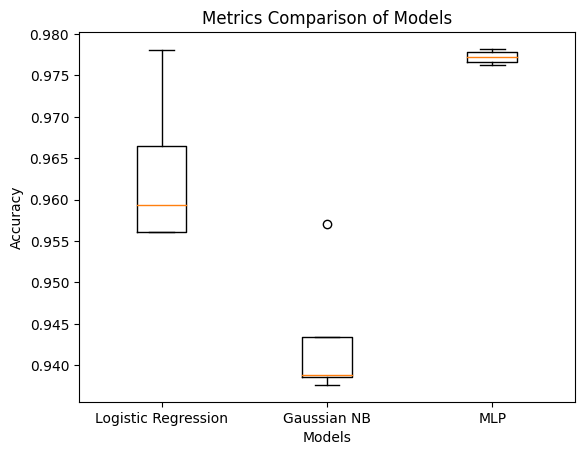

In [34]:
# Visualize accuracy scores
models = ['Logistic Regression', 'Gaussian NB', 'MLP']
accuracies = [
    [accuracy, precision, recall, f1],  # Logistic Regression accuracies
    [accuracy1, precision1, recall1, f11],  # Gaussian NB accuracies
    [accuracy2, precision2, recall2, f12]   # MLP accuracies
]
import matplotlib.pyplot as plt
plt.boxplot(accuracies, labels=models)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Metrics Comparison of Models')
# Display the plot
plt.show()

### Feature Contribution in the model

In [35]:
print("Features contributing to the model:")
for i, class_label in enumerate(model.classes_):
    print(f"\nClass: {class_label}")
    print("Means:")
    class_means = x_train[y_train == class_label].mean().sort_values(ascending=False)
    print(class_means)  # Mean for each feature in this class
    print("Variances:")
    class_variances = x_train[y_train == class_label].var().sort_values(ascending=False)
    print(class_variances)  # Variance for each feature in this class

Features contributing to the model:

Class: Analysis
Means:
FLOW_DURATION_MILLISECONDS    983.686777
IN_BYTES                      653.044628
OUT_BYTES                     254.357025
PROTOCOL                      100.086777
L7_PROTO                        6.851240
TCP_FLAGS                       5.462810
IN_PKTS                         5.088430
OUT_PKTS                        1.824793
Label                           1.000000
dtype: float64
Variances:
FLOW_DURATION_MILLISECONDS    5.252297e+07
IN_BYTES                      1.061450e+07
OUT_BYTES                     3.988982e+05
PROTOCOL                      6.641102e+03
L7_PROTO                      4.117016e+02
IN_PKTS                       1.594504e+02
TCP_FLAGS                     1.172480e+02
OUT_PKTS                      1.359376e+01
Label                         0.000000e+00
dtype: float64

Class: Backdoor
Means:
FLOW_DURATION_MILLISECONDS    2183.454357
IN_BYTES                      1007.562241
OUT_BYTES                      340.

### Ablation Analysis

In [36]:
# Perform ablation analysis
removed_features = []
scores = []

for feature in X.columns:
    # Remove the current feature
    reduced_features = X.drop(feature, axis=1)

    x_train, x_test, y_train, y_test = train_test_split(reduced_features, y, test_size=0.1)

    # Train a new model without the feature
    model = LogisticRegression(random_state=0)
    model.fit(x_train, y_train)

    # Evaluate the model without the feature
    score = accuracy_score(y_test, model.predict(x_test))
    scores.append(score)

    # Store the removed feature
    removed_features.append(feature)

# Create a dataframe with results
results_df = pd.DataFrame({"Feature Removed": removed_features, "Accuracy Score": scores})

# Print the results
print("Ablation Analysis Results:")
print(results_df.to_string())

# Compare the original and reduced model performance
print("Reduced Model Accuracy Range:", min(scores), "-", max(scores))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Ablation Analysis Results:
              Feature Removed  Accuracy Score
0                    PROTOCOL        0.931851
1                    L7_PROTO        0.931269
2                    IN_BYTES        0.928906
3                   OUT_BYTES        0.931584
4                     IN_PKTS        0.929394
5                    OUT_PKTS        0.930623
6                   TCP_FLAGS        0.925393
7  FLOW_DURATION_MILLISECONDS        0.930497
8                       Label        0.928575
Reduced Model Accuracy Range: 0.9253926495376423 - 0.9318514784416894


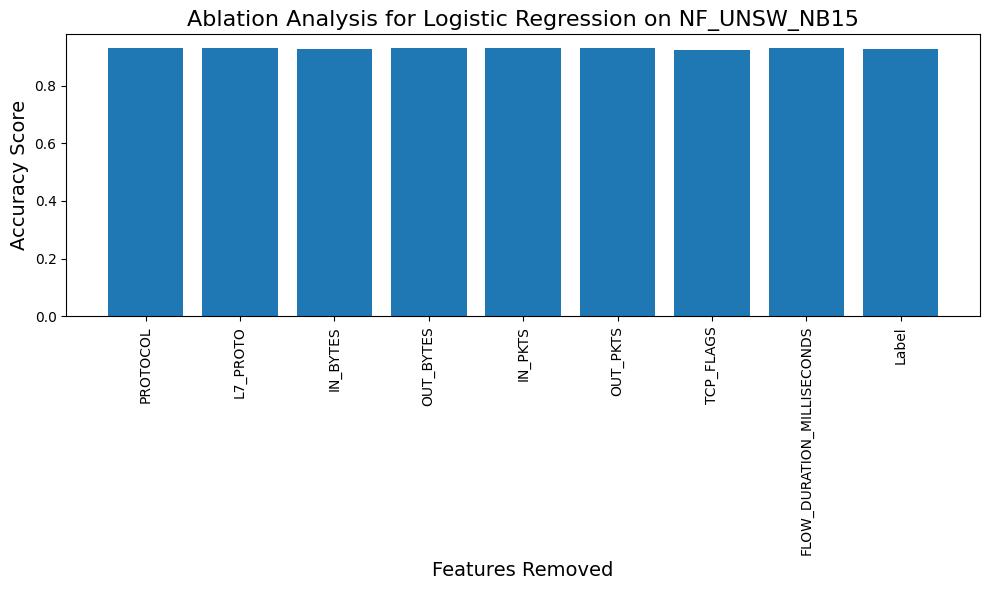

In [37]:
# Prepare data
features = results_df["Feature Removed"]
scores = results_df["Accuracy Score"]

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(features, scores)

# Add labels and title
plt.xlabel("Features Removed", fontsize=14)
plt.ylabel("Accuracy Score", fontsize=14)
plt.title("Ablation Analysis for Logistic Regression on NF_UNSW_NB15", fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()